<a href="https://colab.research.google.com/github/karamalzubi/Google-Colab/blob/main/Advertising_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('/content/Advertising.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [25]:
df.isnull().sum().sum()

np.int64(0)

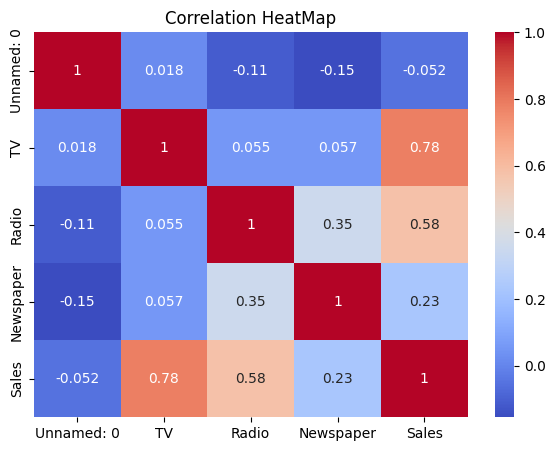

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

In [27]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

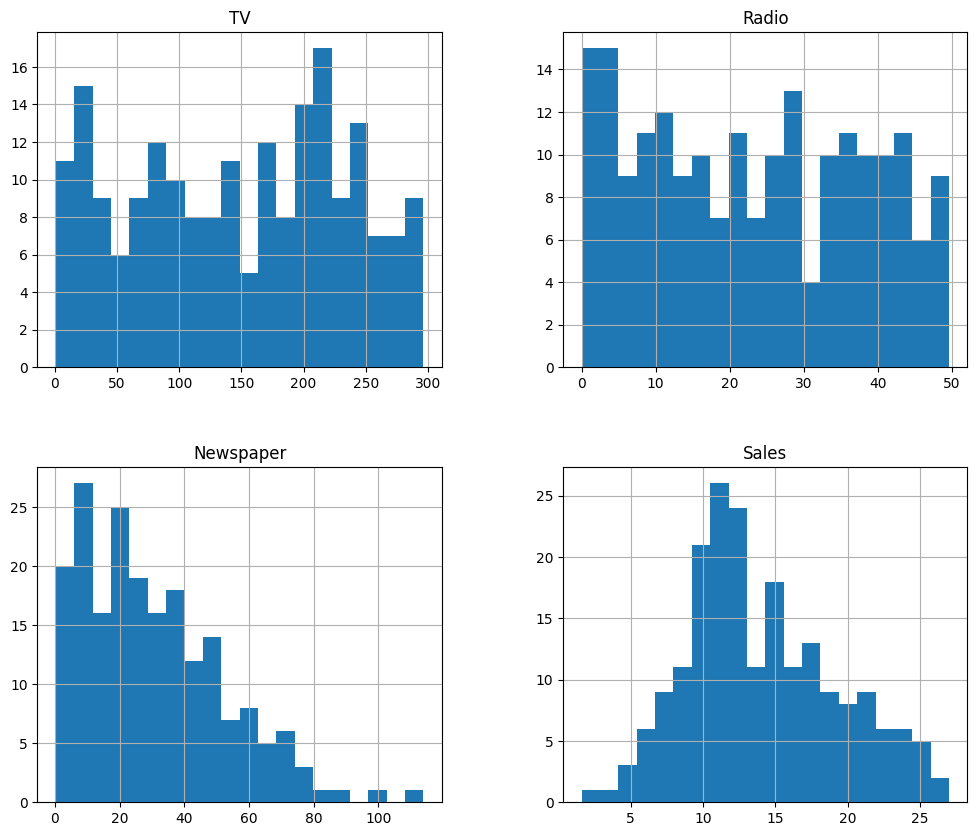

In [28]:
df.hist(figsize=(12,10), bins=20)
plt.show()

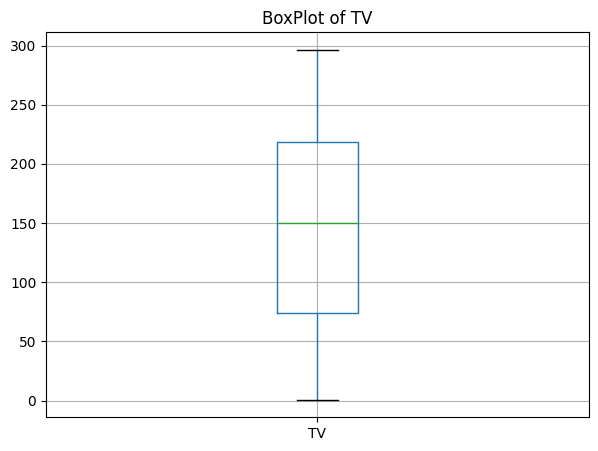

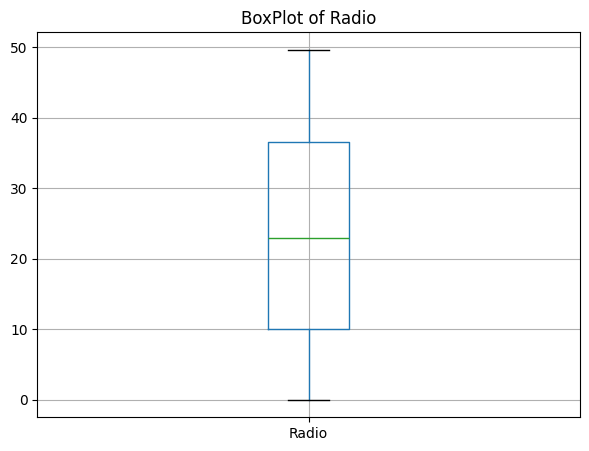

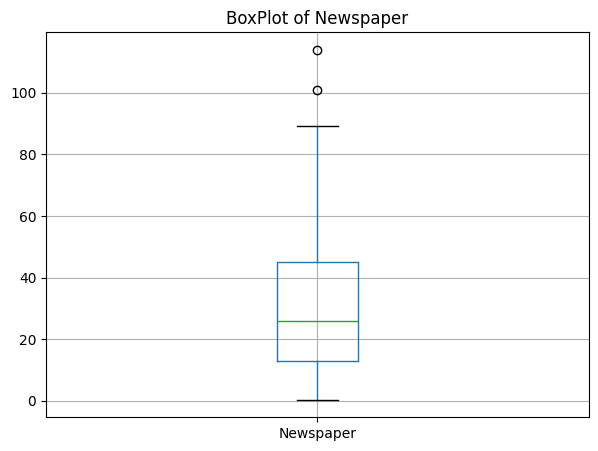

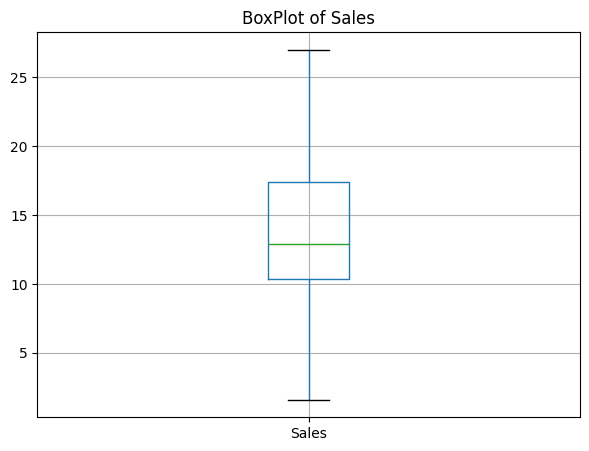

In [29]:
for column in df.columns:
  plt.figure(figsize=(7,5))
  df.boxplot(column=column)
  plt.title(f'BoxPlot of {column}')
  plt.show()



In [30]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

Model Evaluation:
MSE: 3.1740973539761033
MAE: 1.4607567168117603
R2 Score: 0.899438024100912


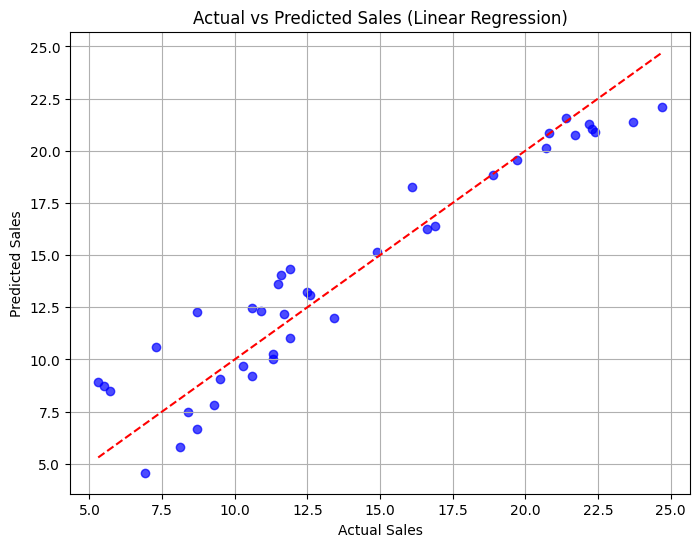

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# R2 Score
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)


# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# R2 Score
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  خط
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Polynomial Regression)')
plt.grid(True)
plt.show()
